## This notebook is meant to be run to test machine learning models, and look at examples of predictions. This code can be run without running any other notebooks and will run quickly and efficiently without needing to scrape any data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')

import os
from dotenv import load_dotenv
load_dotenv()

CLIENT_ID = os.getenv('CLIENT_ID')
CLIENT_SECRET=os.getenv('CLIENT_SECRET')
APP_NAME=os.getenv('APP_NAME')
REDDIT_USERNAME=os.getenv('REDDIT_USERNAME')
REDDIT_PASSWORD=os.getenv('REDDIT_PASSWORD')

import praw
import pandas as pd
import datetime as dt

reddit = praw.Reddit(client_id=CLIENT_ID, client_secret=CLIENT_SECRET, user_agent=APP_NAME, username=REDDIT_USERNAME, password=REDDIT_PASSWORD)

print(reddit.user.me())

%matplotlib inline

Version 7.1.0 of praw is outdated. Version 7.2.0 was released 20 hours ago.


mattcat26


In [20]:
comments_df = pd.read_csv('files/compiled_comments_2_24_2021.csv')
comments_df

,action,content,author,details,submissionId,commentId,WordScore,WholeScore,tfidf,contains_url,...,all_comments_scores,comment_article_score_ratio,comment_comments_score_ratio,adjWordScore,profanity,contains_!,no_url_WordScore,no_url_WholeScore,WordScoreNoStop,WholeScoreNoStop
0,NaN,So what are the implications here? Does it onl...,Cody_Fox23,NaN,4op948,d4eictg,0.000000,0.849655,0.001573,False,...,22,0.118280,1.000000,0.000000,False,False,0.000000,0.816813,0.000000,0.773069
1,NaN,Sadly this isn't new. Police officers use many...,DrFrenchman,NaN,4sef35,d58ts90,0.000000,0.900283,0.255802,False,...,7,0.067416,0.857143,0.000000,False,True,0.000000,0.884829,0.000000,0.857654
2,NaN,What's disturbing about this is that our gover...,bbakks,NaN,4sef35,d58y081,-0.038865,0.869078,0.000000,False,...,7,0.022472,0.285714,-0.038865,False,False,-0.038865,0.866455,-0.038865,0.833865
3,NaN,What I find really concerning is the horrible ...,poliscijunki,NaN,4sef35,d5919n8,0.000000,0.898426,0.000000,True,...,7,-0.011236,-0.142857,-0.015000,False,False,0.000000,0.884435,0.000000,0.865826
4,NaN,This subject might have legs but this article ...,interweb1,NaN,64zsim,dg6l969,0.000000,0.850127,0.000000,False,...,90,0.744186,0.711111,0.000000,False,False,0.000000,0.835723,0.000000,0.826162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10231,NaN,"Yes, while in East Baghdad my platoons mission...",CapitalCockroach,NaN,bav0rl,ekggrgk,1.070477,0.840028,0.000000,True,...,429,0.014675,0.016317,1.020477,False,False,1.070477,0.831097,1.000532,0.827872
10232,NaN,The [definition the FBI currently uses for int...,CQME,NaN,bav0rl,ekyelps,0.941533,0.882768,0.217543,True,...,429,0.004193,0.004662,0.885283,False,False,0.884132,0.870870,0.606157,0.852373
10233,NaN,[Yes.](https://en.m.wikipedia.org/wiki/Islamic...,Silent_As_The_Grave_,NaN,bav0rl,ekehcqg,0.217683,0.779386,0.000000,True,...,429,-0.006289,-0.006993,0.161433,True,False,0.217683,0.833056,0.369440,0.782545
10234,NaN,Has ANY Shia ever committed an act of terroris...,bsmdphdjd,NaN,bav0rl,ekfp4ls,1.293729,0.861529,0.000000,False,...,429,-0.006289,-0.006993,1.143729,False,False,1.293729,0.847163,1.788263,0.834425


In [21]:
comments_df = comments_df.replace({'action': {'removecomment': 0, 'approvecomment': 0, np.nan: 1}})

In [22]:
comments_df['action'] = comments_df['action'].astype('bool')

In [23]:
comments_df

,action,content,author,details,submissionId,commentId,WordScore,WholeScore,tfidf,contains_url,...,all_comments_scores,comment_article_score_ratio,comment_comments_score_ratio,adjWordScore,profanity,contains_!,no_url_WordScore,no_url_WholeScore,WordScoreNoStop,WholeScoreNoStop
0,True,So what are the implications here? Does it onl...,Cody_Fox23,NaN,4op948,d4eictg,0.000000,0.849655,0.001573,False,...,22,0.118280,1.000000,0.000000,False,False,0.000000,0.816813,0.000000,0.773069
1,True,Sadly this isn't new. Police officers use many...,DrFrenchman,NaN,4sef35,d58ts90,0.000000,0.900283,0.255802,False,...,7,0.067416,0.857143,0.000000,False,True,0.000000,0.884829,0.000000,0.857654
2,True,What's disturbing about this is that our gover...,bbakks,NaN,4sef35,d58y081,-0.038865,0.869078,0.000000,False,...,7,0.022472,0.285714,-0.038865,False,False,-0.038865,0.866455,-0.038865,0.833865
3,True,What I find really concerning is the horrible ...,poliscijunki,NaN,4sef35,d5919n8,0.000000,0.898426,0.000000,True,...,7,-0.011236,-0.142857,-0.015000,False,False,0.000000,0.884435,0.000000,0.865826
4,True,This subject might have legs but this article ...,interweb1,NaN,64zsim,dg6l969,0.000000,0.850127,0.000000,False,...,90,0.744186,0.711111,0.000000,False,False,0.000000,0.835723,0.000000,0.826162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10231,True,"Yes, while in East Baghdad my platoons mission...",CapitalCockroach,NaN,bav0rl,ekggrgk,1.070477,0.840028,0.000000,True,...,429,0.014675,0.016317,1.020477,False,False,1.070477,0.831097,1.000532,0.827872
10232,True,The [definition the FBI currently uses for int...,CQME,NaN,bav0rl,ekyelps,0.941533,0.882768,0.217543,True,...,429,0.004193,0.004662,0.885283,False,False,0.884132,0.870870,0.606157,0.852373
10233,True,[Yes.](https://en.m.wikipedia.org/wiki/Islamic...,Silent_As_The_Grave_,NaN,bav0rl,ekehcqg,0.217683,0.779386,0.000000,True,...,429,-0.006289,-0.006993,0.161433,True,False,0.217683,0.833056,0.369440,0.782545
10234,True,Has ANY Shia ever committed an act of terroris...,bsmdphdjd,NaN,bav0rl,ekfp4ls,1.293729,0.861529,0.000000,False,...,429,-0.006289,-0.006993,1.143729,False,False,1.293729,0.847163,1.788263,0.834425


Currently, 51% of the comments are good and 49% are bad...this is a pretty good ratio

In [7]:
X = full_comment_data[['WordScore', 'WholeScore']]
X = X.to_numpy()
y = full_comment_data['action']
y = y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=20)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
neigh = KNeighborsClassifier(n_neighbors = 5)
neigh.fit(X_train, y_train)

KNeighborsClassifier()

In [10]:
y_val = neigh.predict(X_test)

In [11]:
percent_arr = (y_test == y_val)
count = np.count_nonzero(percent_arr)
percentage = (count/(len(percent_arr)))*100
percentage

62.49338274219164

In [12]:
colors = {0: 'red', 1: 'green'}
markers = {0: 'x', 1: '.'}

y_train = np.array(y_train)
y_train = y_train.astype(int)
y_train

array([1, 1, 0, ..., 1, 0, 1])

In [13]:
def plotting(x, y, truth):
    df = pd.DataFrame(x)
    df = df.rename(columns={0: 'WordScore', 1: 'WholeScore'})
    df['action'] = y
    for i in range(2):
        new_df = df[df['action'] == i]
        plt.scatter(new_df['WordScore'], new_df['WholeScore'], c=colors[i], marker=markers[i], label=i)

    plt.xlabel('WordScore')
    plt.ylabel('WholeScore')
    if truth:
        plt.title('True Testing Labels')
    else:
        plt.title('Predicted Testing Labels')

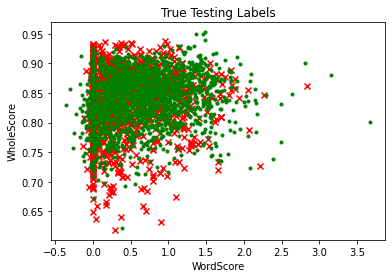

In [14]:
plotting(X_test, y_test, True)

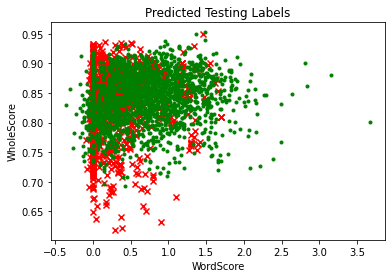

In [15]:
plotting(X_test, y_val, False)

The first version

## Everything below here is used for grabbing examples of what the model finds good and bad as well as what it guessed correctly and incorrectly

In [16]:
full_comment_data = pd.read_csv('files/full_comment_data_with_features1111.csv')
full_topics_data = pd.read_csv('files/full_topics_data1111.csv')

In [17]:
def grabbingExamples(x, yval, ytest, number):
    predicted_comment_row = full_comment_data[full_comment_data['WholeScore'] == x[number][1]]
    predicted_comment_row = predicted_comment_row.reset_index(drop=True)
    
    if len(predicted_comment_row.index) != 1:
        predicted_comment_row = predicted_comment_row[predicted_comment_row['WordScore'] == x[number][1]]
        predicted_comment_row = predicted_comment_row.reset_index(drop=True)

    predicted_topic_row = full_topics_data[full_topics_data['id'] == predicted_comment_row['submissionId'].iloc[0]]
    predicted_comment = predicted_comment_row['content'].values[0]
    predicted_article_text = predicted_topic_row['text'].values[0]
    predicted_article_url = predicted_topic_row['url'].values[0]
    predicted_article_reason_for_removal = predicted_comment_row['details'].values[0]
    yval = yval[number]
    ytest = ytest[number]
    if yval != ytest:
        print('Incorrect Prediction')
        if yval == False:
            print('Predicted bad comment, but was good comment')
        else:
            print('Predicted good comment, but was bad comment')
    else:
        print('Correct Prediction')
        if yval == False:
            print('Correctly predicted bad comment')
        else:
            print('Correctly predicted good comment')
    print('\nThe url that was predicted on: ')
    print(predicted_article_url)
    print('\nThe comment that was predicted on: ')
    print(predicted_comment)
    print('\nThe reason that the comment was removed: ')
    print(predicted_article_reason_for_removal)
    return predicted_article_text

In [18]:
def grabbingExamplesForArray(x, yval, ytest, number):
    predicted_comment_row = full_comment_data[(full_comment_data['WholeScore'] == x[number][1]) & (full_comment_data['WordScore'] == x[number][0])]
    predicted_comment_row = predicted_comment_row.reset_index(drop=True)
    
    if len(predicted_comment_row.index) != 1:
        return

    predicted_topic_row = full_topics_data[full_topics_data['id'] == predicted_comment_row['submissionId'].iloc[0]]
    predicted_comment = predicted_comment_row['content'].values[0]
    predicted_article_text = predicted_topic_row['text'].values[0]
    predicted_article_url = predicted_topic_row['url'].values[0]
    predicted_article_reason_for_removal = predicted_comment_row['details'].values[0]
    yval = yval[number]
    ytest = ytest[number]
    if yval != ytest:
        if yval == False:
            predicted_bad_but_is_good.append(number)
        else:
            predicted_good_but_is_bad.append(number)
    else:
        if yval == False:
            correct_prediction_bad.append(number)
        else:
            correct_prediction_good.append(number)

In [19]:
predicted_bad_but_is_good = []
predicted_good_but_is_bad = []
correct_prediction_good = []
correct_prediction_bad = []

for i in range(2386):
    grabbingExamplesForArray(X_test, y_val, y_test, i)
    

In [20]:
import random
def grabIncorrectlyBadComment():
    integ = random.randint(1, len(predicted_bad_but_is_good))
    number = predicted_bad_but_is_good[integ]
    text = grabbingExamples(X_test, y_val, y_test, number)
    print('\nThe index of the comment is ' + str(number))
    
    
def grabIncorrectlyGoodComment():
    integ = random.randint(1, len(predicted_good_but_is_bad))
    number = predicted_good_but_is_bad[integ]
    text = grabbingExamples(X_test, y_val, y_test, number)
    print('\nThe index of the comment is ' + str(number))
    
def grabCorrectGoodComment():
    integ = random.randint(1, len(correct_prediction_good))
    number = correct_prediction_good[integ]
    text = grabbingExamples(X_test, y_val, y_test, number)
    print('\nThe index of the comment is ' + str(number))
    
    
def grabCorrectBadComment():
    integ = random.randint(1, len(correct_prediction_bad))
    number = correct_prediction_bad[integ]
    text = grabbingExamples(X_test, y_val, y_test, number)
    print('\nThe index of the comment is ' + str(number))
    

In [21]:
grabIncorrectlyBadComment()

Incorrect Prediction
Predicted bad comment, but was good comment

The url that was predicted on: 
https://apnews.com/2fcfa5dda00956b44ffa6dd19564bc36

The comment that was predicted on: 
**/r/NeutralNews is a curated space.** 

In order not to get your comment removed, please familiarize yourself with our [rules on commenting](https://www.reddit.com//r/neutralnews/wiki/guidelines#wiki_comments_.28good.2C_bad_.26amp.3B_ugly.29) before you participate:

#Comment Rules

We expect the following from all users:


1. Be courteous to other users.

1. Source your facts.

1. Be substantive.

1. Address the arguments, not the person.


If you see a comment that violates any of these essential rules, click the associated *report* link so mods can attend to it.

However, **please note that the mods will not remove comments or links reported for lack of neutrality**. There is [no neutrality requirement for comments or links](https://www.reddit.com//r/neutralnews/wiki/guidelines#wiki_neutral-ness) i

In [22]:
grabIncorrectlyGoodComment()

Incorrect Prediction
Predicted good comment, but was bad comment

The url that was predicted on: 
https://www.businessinsider.com/fox-news-karen-mcdougal-case-tucker-carlson-2020-9?r=US&IR=T

The comment that was predicted on: 
Her family lied about their actual heritage.  Playing up an indian heritage that was basically nill.  So her mom would be 5 to 9 generations out.  Her dna test and her own statement about blindly believing her family, support the fact that her family lied.

The reason that the comment was removed: 
confirm_ham

The index of the comment is 279


In [23]:
grabCorrectGoodComment()

Correct Prediction
Correctly predicted good comment

The url that was predicted on: 
https://www.nytimes.com/2020/07/10/us/politics/trump-schools-reopening.html?searchResultPosition=1

The comment that was predicted on: 
I’d like to weigh in on this as a student. It’s infuriating that I’m being made to choose between a proper education and my life. No matter what they choose I loose. Many of the classes that help me in the fields I have been working towards entering cannot be taught online, but it will not be safe with the current case levels and regulations in place if I do choose to go back to school. I feel that not enough has been done to keep me and other students safe.

The reason that the comment was removed: 
nan

The index of the comment is 1437


In [24]:
grabCorrectBadComment()

Correct Prediction
Correctly predicted bad comment

The url that was predicted on: 
https://www.cnn.com/2020/09/09/politics/bob-woodward-rage-book-trump-coronavirus/index.html

The comment that was predicted on: 
Lol what. How is this person in charge of anything?

The reason that the comment was removed: 
remove

The index of the comment is 464
